In [583]:
#Invaluable guidance from: http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/ and https://github.com/ymlai87416/PythonPlayground/blob/master/Python%20notebook/Machine%20learning%20by%20andrew%20ng/machine-learning-ex1/Assignment1.ipynb

In [584]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

In [585]:
#load the data
path = 'C:\\Users\kaisyuenl\Downloads\machine-learning-ex1\machine-learning-ex1\ex1\ex1data1.txt'  
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])  
data.head() 

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


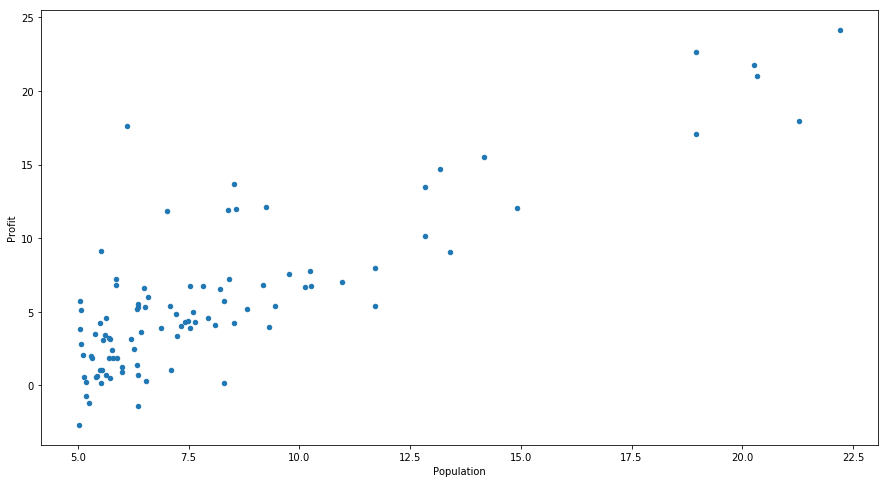

In [586]:
#plot
data.plot(kind='scatter', x='Population', y='Profit', figsize=(15,8))  

In [587]:
data = np.asmatrix(data)
#set training data
X = data[:,-1]; y = data[:, -1:]
m = len(y)
# Add a column of ones to x
X = np.c_[np.ones((m, 1)), data[:,0]]
 # initialize fitting parameters
theta = np.zeros((2, 1))            
iterations = 1500
alpha = 0.01

In [588]:
#define the cost function
def computeCost(X,y,theta):
    m=len(y)
    J=0
    J = sum(np.square((np.matmul(X, theta) - y)))/2/m
    return J    

In [589]:
#calculate initial cost with theta initialised to zeroes
computeCost(X, y, theta)  

matrix([[ 32.07273388]])

In [590]:
#define gradient descent function
def gradientDescent(X, y, theta, alpha, num_iters):
#GRADIENTDESCENT Performs gradient descent to learn theta
#   theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
#   taking num_iters gradient steps with learning rate alpha

# Initialize some useful values
    m = len(y) # number of training examples
    J_history = np.zeros((num_iters, 1))

    for i in range(num_iters):
        theta = theta - alpha*(1.0/m) * np.transpose(X).dot(X.dot(theta) - y)
        # Save the cost J in every iteration    
        J_history[i] = computeCost(X, y, theta)

    return (theta, J_history)

In [591]:
# testing of the cost function further
J = computeCost(X, y, np.array([[-1],[2]]))
print('\nWith theta = [-1 ; 2]\nCost computed = %f\n' % J)
print('Expected cost value (approx) 54.24\n')

print('\nRunning Gradient Descent ...\n')
# run gradient descent
(theta, J_history) = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent:\n');
print(theta)
print('Expected theta values (approx)\n');
print(' -3.6303\n  1.1664\n\n');


With theta = [-1 ; 2]
Cost computed = 54.242455

Expected cost value (approx) 54.24


Running Gradient Descent ...

Theta found by gradient descent:

[[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)

 -3.6303
  1.1664




In [592]:
#compute new cost with model parameters found via gradient descent
computeCost(X,y,theta)

matrix([[ 4.48338826]])

In [593]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = [1, 3.5]*theta
print('For population = 35,000, we predict a profit of %f\n' % (predict1*10000))
predict2 = [1, 7]*theta
print('For population = 70,000, we predict a profit of %f\n' % (predict2*10000))

For population = 35,000, we predict a profit of 4519.767868

For population = 70,000, we predict a profit of 45342.450129



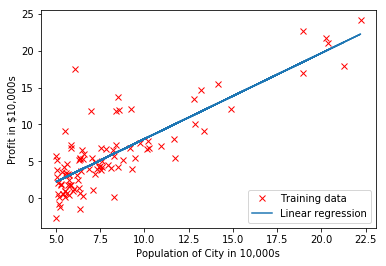

In [594]:
# Plot the linear fit
plt.plot(X[:,1], y, 'rx', label='Training data')
plt.plot(X[:,1], np.matmul(X, theta), '-' , label='Linear regression')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc='lower right')

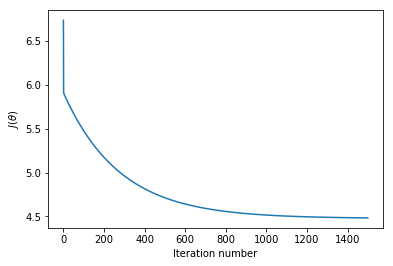

In [595]:
#plot the cost decrease at each iteration
plt.plot(J_history)
plt.xlabel(r'Iteration number')
plt.ylabel(r'$J(\theta)$') 

In [596]:
#Linear regression with multiple variables
path = 'C:\\Users\kaisyuenl\Downloads\machine-learning-ex1\machine-learning-ex1\ex1\ex1data2.txt' 
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])  
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [597]:
data2 = np.asmatrix(data2)
#set training data
X2 = data2[:,0:-1]; y2 = data2[:, -1:]
m=len(y2)        

In [598]:
# Print out some data points
print('First 10 examples from the dataset: \n');
for i in range(10):
    print(' x = [%.0f %.0f], y = %.0f \n' % (X2[1, 0], X2[i, 1], y2[i, 0]));

First 10 examples from the dataset: 

 x = [1600 3], y = 399900 

 x = [1600 3], y = 329900 

 x = [1600 3], y = 369000 

 x = [1600 2], y = 232000 

 x = [1600 4], y = 539900 

 x = [1600 4], y = 299900 

 x = [1600 3], y = 314900 

 x = [1600 3], y = 198999 

 x = [1600 3], y = 212000 

 x = [1600 3], y = 242500 



In [599]:
def featureNormalize(X):
    
    # compute mean and standard deviation
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [600]:
# normalize features
X2, mu, sigma = featureNormalize(X2)

In [601]:
# Add intercept term to X2
X2 = np.hstack((np.ones((X2.shape[0],1)), X2))
#initialise theta
theta2 = np.zeros((3, 1))

In [602]:
#reuse gradient descent function from previous exercise
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    return gradientDescent(X, y, theta, alpha, num_iters)

In [603]:
# Choose some alpha value
alpha = 0.01;
num_iters = 400;

# Init Theta and Run Gradient Descent 
(theta, J_history) = gradientDescentMulti(X2, y2, theta2, alpha, num_iters)

In [604]:
# Display gradient descent's result
print('Theta computed from gradient descent: \n');
print(theta);
print('\n');

#compute cost of gradient descent
computeCost(X2,y2,theta)

Theta computed from gradient descent: 

[[ 334302.06399328]
 [  99411.44947359]
 [   3267.01285407]]




matrix([[  2.10544829e+09]])

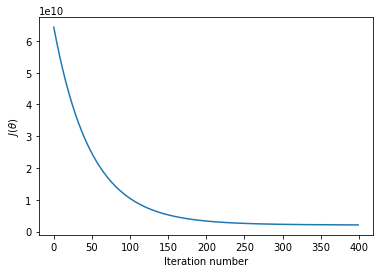

In [606]:
# Plot the convergence graph
plt.plot(J_history)
plt.xlabel(r'Iteration number')
plt.ylabel(r'$J(\theta)$')

In [607]:
# Predict the price of a 1650 sq-ft, 3 br house

vals = (np.array([1650, 3]) - mu) / sigma
vals = np.column_stack((np.ones([1]), vals))

predict = np.dot(vals, theta)
print('A 1650 sq-ft 3 br house will cost $%6.2f' % predict)

A 1650 sq-ft 3 br house will cost $289221.55
